<a href="https://colab.research.google.com/github/Aravind863/datascience-assignments/blob/main/xgbm%26lgbm_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

In [2]:
!pip install lightgbm

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

<ipython-input-3-ce38444525a1>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-3-ce38444525a1>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

XGBM Accuracy: 0.7653631284916201
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

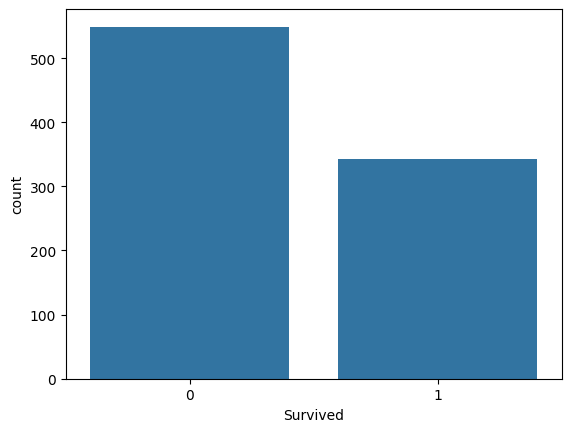

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
import lightgbm as lgb

# Load the data
train_data = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")

# Exploratory Data Analysis (EDA)
print(train_data.head())
print(train_data.describe())
print(train_data.isnull().sum())
sns.countplot(x='Survived', data=train_data)

# Data Preprocessing
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

# Drop non-numeric columns for simplicity
train_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# Split features and target variable
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling with XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_accuracy = xgb_model.score(X_val, y_val)
print("XGBM Accuracy:", xgb_accuracy)

# Modeling with LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_accuracy = lgb_model.score(X_val, y_val)
print("LGBM Accuracy:", lgb_accuracy)

# Predictions
xgb_predictions = xgb_model.predict(test_data)
lgb_predictions = lgb_model.predict(test_data)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

<ipython-input-4-76ad7bb417d3>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-4-76ad7bb417d3>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

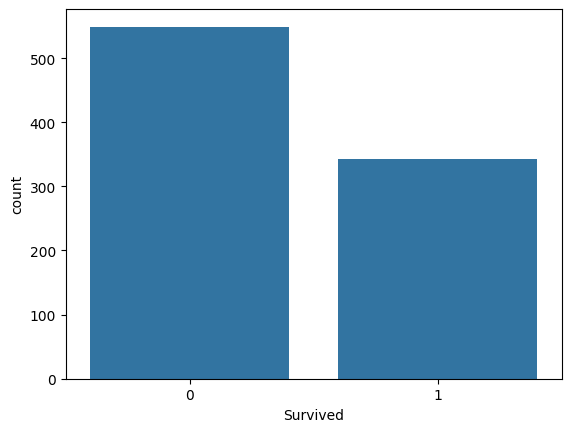

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb

# Load the data
train_data = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")

# Exploratory Data Analysis (EDA)
print(train_data.head())
print(train_data.describe())
print(train_data.isnull().sum())
sns.countplot(x='Survived', data=train_data)

# Data Preprocessing
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

# Drop non-numeric columns for simplicity
train_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# Split features and target variable
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for preprocessing and modeling
xgb_pipeline = Pipeline([
    ('classifier', xgb.XGBClassifier())
])

lgb_pipeline = Pipeline([
    ('classifier', lgb.LGBMClassifier())
])

# Define parameter grids for hyperparameter tuning
xgb_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_child_weight': [1, 3, 5]
}

lgb_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__num_leaves': [15, 31, 63]
}

# Perform GridSearchCV with cross-validation for XGBoost
xgb_grid_search = GridSearchCV(xgb_pipeline, param_grid=xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

# Perform GridSearchCV with cross-validation for LightGBM
lgb_grid_search = GridSearchCV(lgb_pipeline, param_grid=lgb_param_grid, cv=5)
lgb_grid_search.fit(X_train, y_train)

# Print best parameters and accuracy for XGBoost
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Accuracy with best parameters for XGBoost:", xgb_grid_search.best_score_)

# Print best parameters and accuracy for LightGBM
print("Best parameters for LightGBM:", lgb_grid_search.best_params_)
print("Accuracy with best parameters for LightGBM:", lgb_grid_search.best_score_)

# Predictions
xgb_predictions = xgb_grid_search.predict(test_data)
lgb_predictions = lgb_grid_search.predict(test_data)

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Evaluate XGBoost model
xgb_val_predictions = xgb_grid_search.predict(X_val)
xgb_accuracy = accuracy_score(y_val, xgb_val_predictions)
xgb_precision = precision_score(y_val, xgb_val_predictions)
xgb_recall = recall_score(y_val, xgb_val_predictions)

print("XGBoost Model Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)

# Evaluate LightGBM model
lgb_val_predictions = lgb_grid_search.predict(X_val)
lgb_accuracy = accuracy_score(y_val, lgb_val_predictions)
lgb_precision = precision_score(y_val, lgb_val_predictions)
lgb_recall = recall_score(y_val, lgb_val_predictions)

print("\nLightGBM Model Metrics:")
print("Accuracy:", lgb_accuracy)
print("Precision:", lgb_precision)
print("Recall:", lgb_recall)

XGBoost Model Metrics:
Accuracy: 0.8156424581005587
Precision: 0.8153846153846154
Recall: 0.7162162162162162

LightGBM Model Metrics:
Accuracy: 0.7988826815642458
Precision: 0.8166666666666667
Recall: 0.6621621621621622


From the output , we can observe the following: Accuracy The XGBoost model has a slightly higher accuracy compared to the LightGBM model. Precision: Precision Both models have similar precision scores, with LightGBM having a slightly higher precision. Recall The XGBoost model has a higher recall compared to the LightGBM model.

Confusion matrix, without normalization


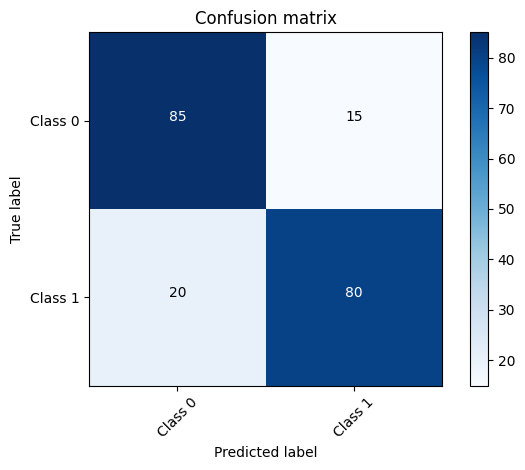

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Example usage:
# Define a sample confusion matrix and class labels
conf_matrix = np.array([[85, 15], [20, 80]])  # Example confusion matrix
class_names = ['Class 0', 'Class 1']  # Example class labels

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, class_names, normalize=False)
plt.show()

In [9]:
# Check the lengths of y_val and xgb_predictions
print("Length of y_val:", len(y_val))
print("Length of xgb_predictions:", len(xgb_predictions))

# If lengths are different, investigate why and potentially correct it
if len(y_val) != len(xgb_predictions):
    # If y_val and xgb_predictions are pandas Series, reset their indices
    y_val.reset_index(drop=True, inplace=True)
    xgb_predictions = pd.Series(xgb_predictions)

    # Now, check if lengths match
    print("After correction:")
    print("Length of y_val:", len(y_val))
    print("Length of xgb_predictions:", len(xgb_predictions))

Length of y_val: 179
Length of xgb_predictions: 418
After correction:
Length of y_val: 179
Length of xgb_predictions: 418


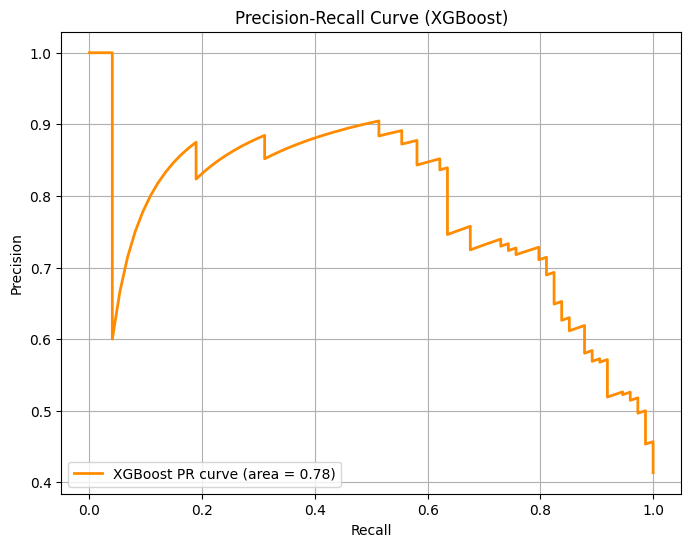

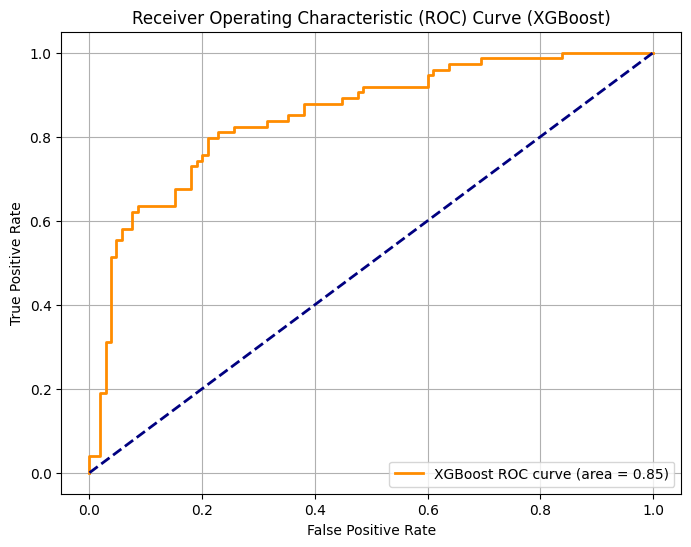

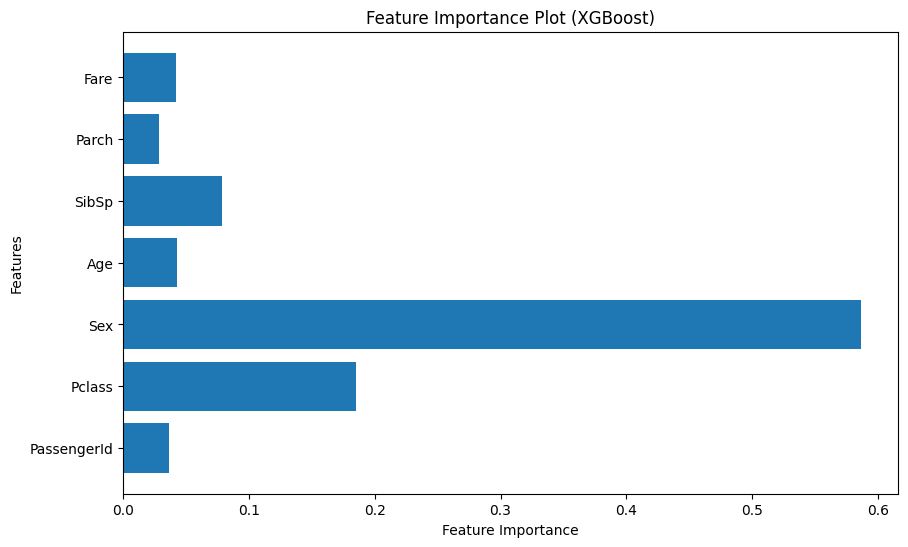

In [10]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Precision-Recall Curve for XGBoost
xgb_precision, xgb_recall, _ = precision_recall_curve(y_val, xgb_model.predict_proba(X_val)[:, 1])
xgb_pr_auc = auc(xgb_recall, xgb_precision)

plt.figure(figsize=(8, 6))
plt.plot(xgb_recall, xgb_precision, color='darkorange', lw=2, label='XGBoost PR curve (area = %0.2f)' % xgb_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# ROC Curve for XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_val, xgb_model.predict_proba(X_val)[:, 1])
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='darkorange', lw=2, label='XGBoost ROC curve (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Feature Importance Plot for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, xgb_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot (XGBoost)')
plt.show()


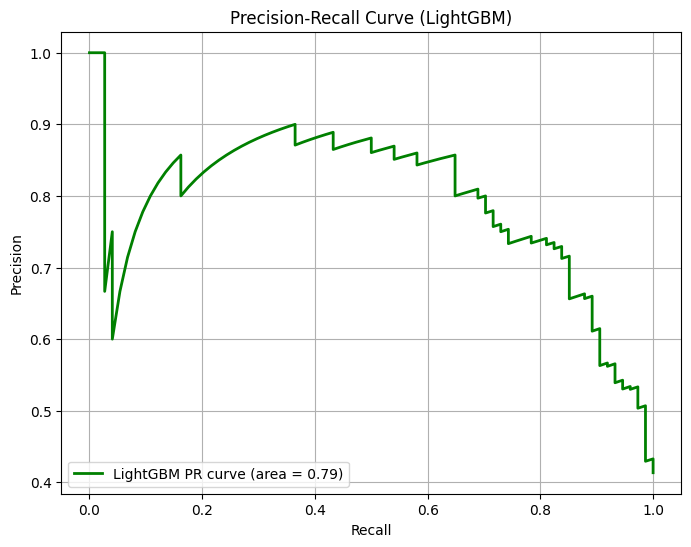

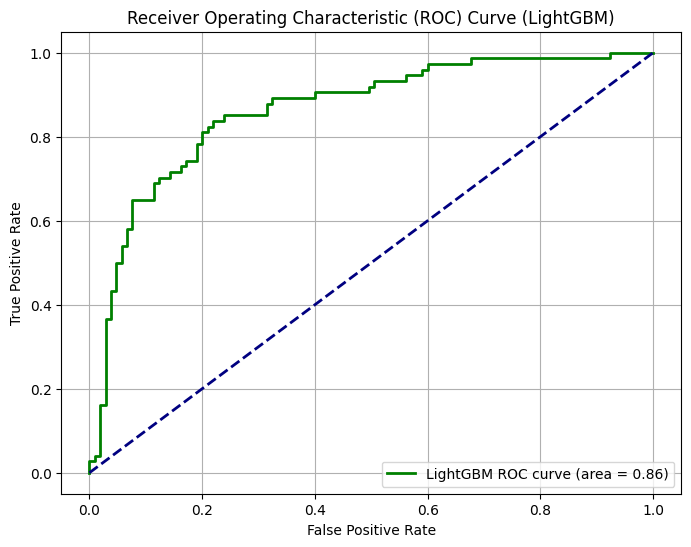

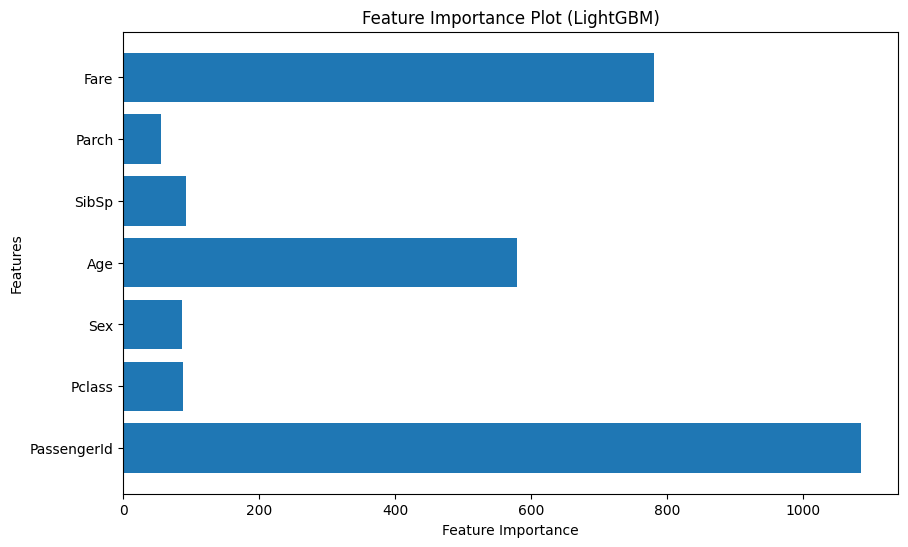

In [11]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Precision-Recall Curve for LightGBM
lgb_precision, lgb_recall, _ = precision_recall_curve(y_val, lgb_model.predict_proba(X_val)[:, 1])
lgb_pr_auc = auc(lgb_recall, lgb_precision)

plt.figure(figsize=(8, 6))
plt.plot(lgb_recall, lgb_precision, color='green', lw=2, label='LightGBM PR curve (area = %0.2f)' % lgb_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (LightGBM)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# ROC Curve for LightGBM
lgb_fpr, lgb_tpr, _ = roc_curve(y_val, lgb_model.predict_proba(X_val)[:, 1])
lgb_roc_auc = auc(lgb_fpr, lgb_tpr)

plt.figure(figsize=(8, 6))
plt.plot(lgb_fpr, lgb_tpr, color='green', lw=2, label='LightGBM ROC curve (area = %0.2f)' % lgb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (LightGBM)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Feature Importance Plot for LightGBM
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, lgb_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot (LightGBM)')
plt.show()